In [33]:
############ New Science of Hitting Example#################

# Imports
from pybaseball import statcast
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

####################################Just hue broken for literally no reason########################## on that hitting piece example


538 Hitting Piece; Example 

In [4]:
#data = statcast('2023-03-01','2023-06-30')
data = statcast('2017-05-01','2017-06-30')
print(data.shape)

This is a large query, it may take a moment to complete


100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:22<00:00,  2.68it/s]


(247710, 92)


In [64]:
Hitdata = data.dropna(subset=['launch_angle','launch_speed', 'estimated_ba_using_speedangle'])

In [65]:
Hitdata.shape


(43130, 92)

fig, ax = plt.subplots(figsize=(8, 8))  ######## Hue for the plotting is broken for no reason really 
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="estimated_ba_using_speedangle", 
                palette='viridis', 
                data=Hitdata, ax=ax)
ax.set_title("Hit probability by Launch Angle and Exit Velocity");

In [79]:
Hitdata['hr'] = Hitdata.events=='home_run'


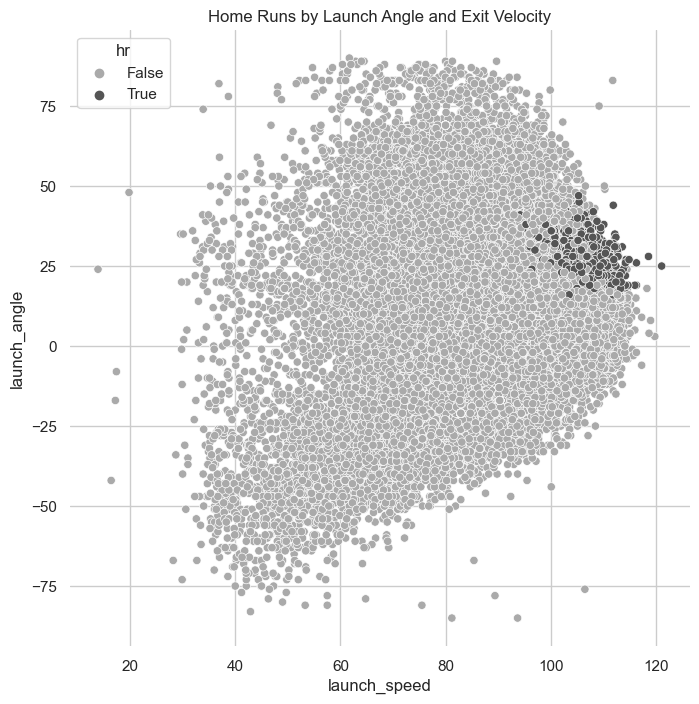

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hr", 
                palette='binary', 
                data=Hitdata, ax=ax)
ax.set_title("Home Runs by Launch Angle and Exit Velocity");

In [81]:
Hitdata.groupby(pd.cut(Hitdata.launch_speed, 6)).mean()


,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,hr
launch_speed,,,,,,,,,,,,,,,,,,,,,
"(13.793, 31.767]",87.933333,-1.070952,5.817143,531710.142857,519580.0,<NA>,<NA>,<NA>,<NA>,9.47619,...,2.52381,2.714286,3.47619,1.809524,2.571429,2.714286,202.333333,-0.001381,-0.20081,0.000000
"(31.767, 49.633]",87.86699,-0.846262,5.869235,531585.913835,531713.015777,<NA>,<NA>,<NA>,<NA>,9.057039,...,2.131068,2.225728,2.277913,2.112864,2.165049,2.225728,184.120146,0.000345,-0.125742,0.000000
"(49.633, 67.5]",88.049904,-0.867298,5.868271,525672.636364,527493.190141,<NA>,<NA>,<NA>,<NA>,8.611396,...,2.418374,2.447823,2.554097,2.37388,2.480154,2.447823,182.849872,0.000612,-0.119364,0.000000
"(67.5, 85.367]",88.28464,-0.906213,5.87684,526761.861113,530083.18921,<NA>,<NA>,<NA>,<NA>,7.594783,...,2.445945,2.484398,2.568129,2.423342,2.507072,2.484398,183.628261,0.000452,-0.119183,0.000000
"(85.367, 103.233]",88.978009,-0.969557,5.888883,524363.475547,531396.542639,<NA>,<NA>,<NA>,<NA>,6.466011,...,2.439223,2.454805,2.630769,2.462227,2.638191,2.454805,186.887392,0.000115,0.107485,0.051757
"(103.233, 121.1]",89.733368,-0.929528,5.905656,528890.478618,532557.203076,<NA>,<NA>,<NA>,<NA>,6.046345,...,2.417316,2.385085,2.730356,2.593427,2.938698,2.385085,191.556773,0.001668,0.514939,0.232989


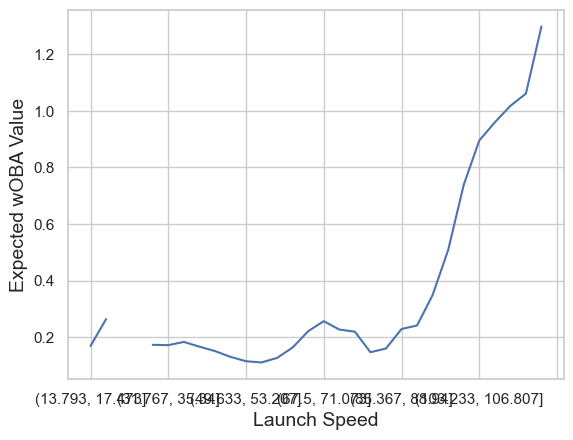

In [82]:
groups = Hitdata.groupby(pd.cut(Hitdata.launch_speed, 30))
ax = groups['estimated_woba_using_speedangle'].mean().plot()
ax.set_xlabel('Launch Speed', fontsize=14)
ax.set_ylabel('Expected wOBA Value', fontsize=14);

NYT Examples Strikeouts on the rise Expanding to 2023  

In [101]:
from pybaseball import team_pitching
from pybaseball import team_batting
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
pitching_data = team_pitching(1900,2023)
batting_data = team_batting(1900,2023)

In [104]:
batting_data.shape

(3015, 319)

In [105]:
batting_data.head()

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1168,1926,SLS,27,869,2897,3254,959,617,159,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,25.6
1,1137,1943,HG,31,715,2436,2743,803,604,117,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,24.2
2,1096,1929,NLG,31,573,1959,2228,636,429,136,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,18.0
3,1168,1928,SLS,27,738,2564,2769,814,516,145,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,25.9
4,9,1927,NYY,29,1725,5354,6222,1644,1092,291,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,49.3


In [106]:
batting_data.describe() # descriptive statistics 

,teamIDfg,Season,Age,G,AB,PA,H,1B,2B,3B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
count,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,3015.000000,...,270.000000,510.000000,270.000000,3015.000000,660.000000,660.000000,0.0,0.0,0.0,3015.000000
mean,148.630846,1966.345605,27.972471,1769.709784,4868.274295,5462.922720,1270.620564,902.193698,220.448756,40.462355,...,115.811852,745.092157,0.362067,349.433831,0.169764,0.267295,NaN,NaN,NaN,16.864842
std,362.465737,35.591457,1.291686,573.642328,1346.466737,1523.013539,357.534151,251.225089,75.616466,21.125415,...,1.999072,742.621559,0.032293,1144.790000,0.010848,0.011641,NaN,NaN,NaN,9.462770
min,1.000000,1900.000000,22.000000,9.000000,27.000000,28.000000,9.000000,5.000000,1.000000,0.000000,...,111.500000,0.000000,0.273000,0.000000,0.140000,0.236000,NaN,NaN,NaN,-9.900000
25%,8.000000,1935.000000,27.000000,1649.000000,5140.000000,5787.500000,1278.000000,902.000000,192.000000,26.000000,...,114.400000,0.000000,0.338250,0.000000,0.162000,0.258750,NaN,NaN,NaN,9.800000
50%,17.000000,1969.000000,28.000000,1859.000000,5409.000000,6059.000000,1385.000000,977.000000,235.000000,36.000000,...,115.500000,543.000000,0.362000,0.000000,0.170000,0.267000,NaN,NaN,NaN,17.100000
75%,27.000000,1998.000000,29.000000,2204.000000,5521.000000,6198.000000,1461.000000,1038.000000,273.000000,52.000000,...,117.100000,1493.750000,0.385750,0.000000,0.177000,0.275000,NaN,NaN,NaN,23.650000
max,1180.000000,2023.000000,34.000000,2597.000000,5781.000000,6554.000000,1783.000000,1297.000000,376.000000,129.000000,...,122.400000,1994.000000,0.458000,4683.000000,0.204000,0.303000,NaN,NaN,NaN,49.300000


In [92]:
pitching_data.shape

(3013, 392)

In [93]:
pitching_data.head() # .head vs .head() (.head() give table format)

,teamIDfg,Season,Team,Age,W,L,ERA,G,GS,CG,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
0,17,1907,CHC,28,107,44,1.73,200,155,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,1909,CHC,26,104,49,1.74,212,155,111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,1906,CHC,27,115,36,1.75,187,154,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1910,PHA,26,102,48,1.79,200,155,123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1909,PHA,26,95,58,1.93,214,153,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
pitching_data.describe()

,teamIDfg,Season,Age,W,L,ERA,G,GS,CG,ShO,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,...,120.000000,108.000000,108.000000,108.000000,120.000000,120.000000,120.000000,2.000000,2.0,2.000000
mean,147.960836,1966.374710,27.726187,71.366412,71.209758,3.960551,390.380352,143.186193,37.882177,6.374046,...,97.933333,103.333333,98.231481,102.768519,99.950000,100.025000,100.041667,86.000000,94.0,102.500000
std,361.651336,35.585269,1.569453,23.071454,23.025561,0.849119,189.167527,39.148017,33.502647,5.437788,...,3.317216,24.290300,5.532582,8.425159,5.475461,1.362539,2.352884,4.242641,0.0,3.535534
min,1.000000,1900.000000,22.000000,0.000000,1.000000,1.730000,2.000000,1.000000,0.000000,0.000000,...,88.000000,29.000000,80.000000,69.000000,85.000000,97.000000,93.000000,83.000000,94.0,100.000000
25%,8.000000,1935.000000,27.000000,64.000000,64.000000,3.460000,264.000000,154.000000,8.000000,2.000000,...,96.000000,88.750000,95.000000,98.000000,96.000000,99.000000,98.000000,84.500000,94.0,101.250000
50%,17.000000,1969.000000,28.000000,76.000000,76.000000,3.920000,381.000000,161.000000,30.000000,5.000000,...,98.000000,104.000000,99.000000,103.000000,99.500000,100.000000,100.000000,86.000000,94.0,102.500000
75%,27.000000,1998.000000,29.000000,87.000000,86.000000,4.400000,551.000000,162.000000,62.000000,10.000000,...,100.000000,118.000000,102.000000,109.000000,103.250000,101.000000,102.000000,87.500000,94.0,103.750000
max,1180.000000,2023.000000,37.000000,116.000000,120.000000,21.000000,794.000000,165.000000,148.000000,32.000000,...,107.000000,194.000000,109.000000,123.000000,116.000000,104.000000,107.000000,89.000000,94.0,105.000000


In [95]:
league_averagebat = batting_data.groupby('Season', as_index=False)['HR'].mean()

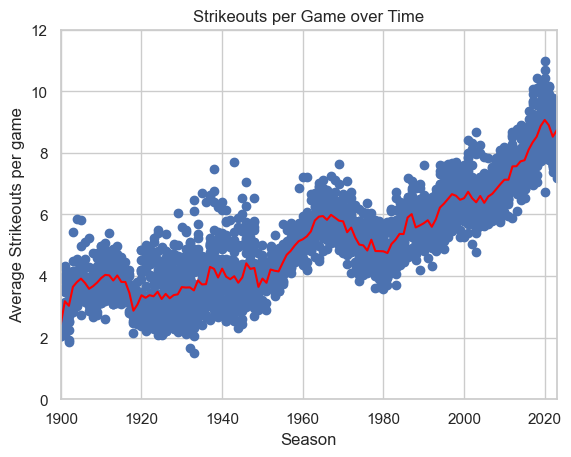

In [98]:
plt.scatter(batting_data['Season'], batting_data['HR'])
plt.plot(league_averagebat['Season'], league_averagebat['HR'], c='red')
plt.xlim(1900,2023)
plt.ylim(0,12)
plt.xlabel('Season')
plt.ylabel('Average Strikeouts per game')
plt.title('Strikeouts per Game over Time');

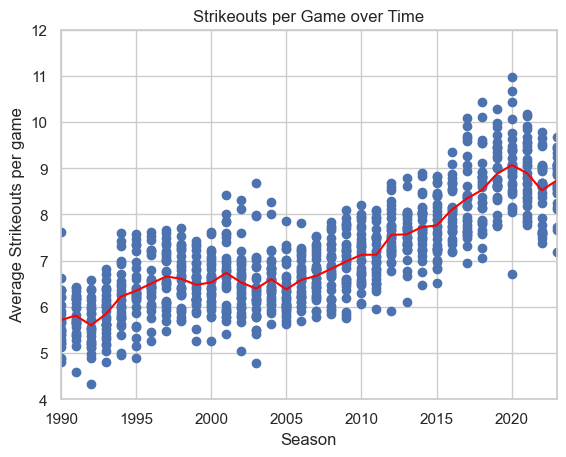

In [100]:
plt.scatter(batting_data['Season'], batting_data['HR'])
plt.plot(league_average['Season'], league_averagebat['HR'], c='red')
plt.xlim(1990,2023)
plt.ylim(4,12)
plt.xlabel('Season')
plt.ylabel('Average Strikeouts per game')
plt.title('Strikeouts per Game over Time');

In [112]:
league_averageHR = batting_data.groupby('Season', as_index=False)['HR'].mean()

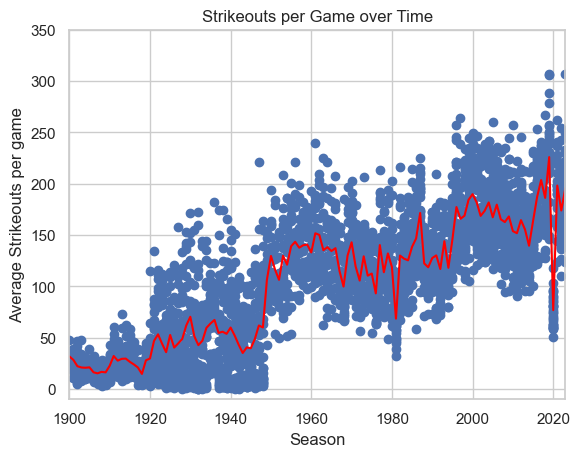

In [115]:
plt.scatter(batting_data['Season'], batting_data['HR'])
plt.plot(league_averageHR['Season'], league_averageHR['HR'], c='red')
plt.xlim(1900,2023)
plt.ylim(-10,350)
plt.xlabel('Season')
plt.ylabel('Average HR per Season')
plt.title('HR per season over Time');